## 1) Importing Libraries & Data Load

In [78]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [79]:
# Define the path to the Excel file

file_path = r"D:\Customer Churn Analytics MySQL ETL, Power BI Insights & Machine Learning Prediction\Prediction_data.xlsx"

In [80]:
# Define the sheet name to read data from
sheet_name = 'vw_churndata'

In [81]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [82]:
# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.10,6683.40,0.00,0,631.72,7315.12,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.15,169.05,0.00,10,122.37,301.42,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.05,8297.50,42.57,110,1872.98,10237.91,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.40,5969.30,0.00,0,219.39,6188.69,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.60,4084.35,0.00,140,332.08,4556.43,Stayed,Others,Others


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [84]:
data.dtypes

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [85]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


## 2) Data Preprocessing

In [86]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


In [87]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

In [88]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

In [89]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [90]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']


In [91]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3)  Train Random Forest Model

In [92]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [93]:
# Train the model

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:


# Make predictions

y_pred = rf_model.predict(X_test)

In [95]:
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [96]:
# Get churn probabilities on TEST set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]


In [97]:
y_test_pred_40 = (y_test_prob >= 0.40).astype(int)

print("Evaluation with threshold = 0.40")
print(classification_report(y_test, y_test_pred_40))


Evaluation with threshold = 0.40
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       847
           1       0.70      0.73      0.71       355

    accuracy                           0.83      1202
   macro avg       0.79      0.80      0.79      1202
weighted avg       0.83      0.83      0.83      1202



recall did improve (from 0.65 → 0.73), so using predict_proba + threshold is justified.

In [98]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_46788\327722477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices],palette='viridis')


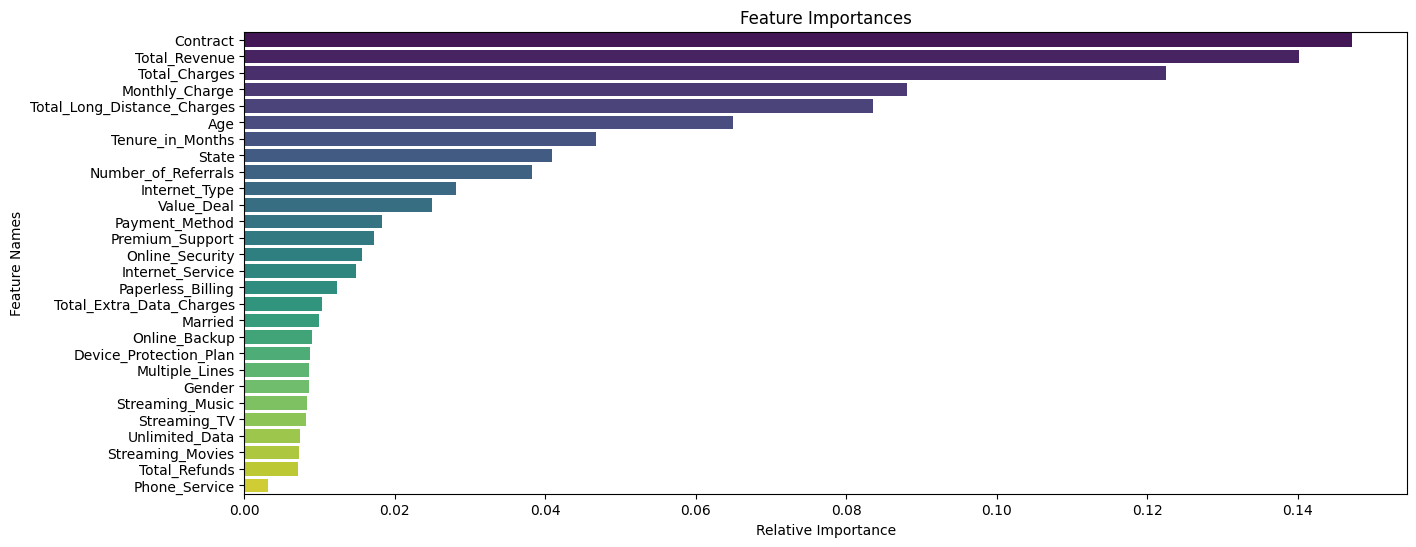

In [99]:
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices],palette='viridis')

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()


## 4)  Use Model for Prediction on New Data

In [100]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\Customer Churn Analytics MySQL ETL, Power BI Insights & Machine Learning Prediction\Prediction_data.xlsx"

In [101]:

# Define the sheet name to read data from

sheet_name = 'vw_joindata'

In [102]:
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [103]:
# Display the first few rows of the fetched data

print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check          24.30         38.45           0.0   
1  Bank Withdrawal          

In [104]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

In [105]:
# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']


In [106]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

In [107]:

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [108]:
# Make predictions

# Predict churn probability for new customers
new_prob = rf_model.predict_proba(new_data)[:, 1]

# Apply chosen threshold (0.40)
new_predictions = (new_prob >= 0.40).astype(int)


In [109]:
# Attach results
original_data['Churn_Probability'] = new_prob
original_data['Customer_Status_Predicted'] = new_predictions

In [110]:
# Filter churn-risk customers
original_data = original_data[
    original_data['Customer_Status_Predicted'] == 1
]



In [111]:
original_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Churn_Probability,Customer_Status_Predicted
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,38.45,0.0,0,0.00,38.45,Joined,Others,Others,0.96,1
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,268.45,0.0,0,94.44,362.89,Joined,Others,Others,0.71,1
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,19.90,0.0,0,11.83,31.73,Joined,Others,Others,0.97,1
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,19.55,0.0,0,10.20,29.75,Joined,Others,Others,0.91,1
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,62.80,0.0,0,42.19,104.99,Joined,Others,Others,0.98,1


In [112]:
original_data.shape

(391, 34)

In [114]:
original_data.to_csv(r"D:\Customer Churn Analytics MySQL ETL, Power BI Insights & Machine Learning Prediction\Churn_Risk_Customers_Predictions.csv", index=False)


---

## 🔍 Machine Learning Model Development & Evaluation (Customer Churn Prediction)

### 1️⃣ Model Overview

In this phase, I built a **Customer Churn Prediction model** using the **Random Forest Classifier**.
The objective was to identify customers who are likely to churn based on their demographic, service usage, billing, and contract-related attributes.

* **Algorithm Used:** Random Forest Classifier
* **Reason for Selection:**

  * Handles both numerical and categorical features effectively
  * Robust to noise and overfitting
  * Provides strong baseline performance without heavy tuning

---

### 2️⃣ Model Training

I trained the model using the cleaned and encoded dataset.

```python
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
```

The dataset was split into training and testing sets to ensure unbiased evaluation.

---

### 3️⃣ Initial Model Evaluation (Default Threshold = 0.50)

After training, I evaluated the model using the default classification threshold (`0.50`).

#### 📊 Initial Evaluation Metrics

| Class        | Precision | Recall | F1-Score |
| ------------ | --------- | ------ | -------- |
| Stayed (0)   | 0.86      | 0.92   | 0.89     |
| Churned (1)  | 0.78      | 0.65   | 0.71     |
| **Accuracy** |           |        | **0.84** |

**Key Observation:**

* The overall accuracy was **84%**, which is good.
* However, **recall for churned customers (65%)** was relatively low.
* This means the model was **missing some actual churners**, which is risky for business use.

---

### 4️⃣ Improving Recall Using Probability Threshold Tuning

Since predicting churn correctly is more important than overall accuracy, I decided to use **probability-based predictions** and adjusted the decision threshold.

Instead of using only class predictions, I used:

```python
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_40 = (y_test_prob >= 0.40).astype(int)
```

This lowers the threshold from **0.50 → 0.40**, allowing the model to identify more potential churners.

---

### 5️⃣ Improved Model Evaluation (Threshold = 0.40)

#### 📊 Improved Evaluation Metrics

| Class        | Precision | Recall | F1-Score |
| ------------ | --------- | ------ | -------- |
| Stayed (0)   | 0.89      | 0.87   | 0.88     |
| Churned (1)  | 0.70      | 0.73   | 0.71     |
| **Accuracy** |           |        | **0.83** |

---

### 6️⃣ Comparison: Before vs After Threshold Tuning

| Metric          | Initial Model (0.50) | Improved Model (0.40) |
| --------------- | -------------------- | --------------------- |
| Accuracy        | 0.84                 | 0.83                  |
| Churn Recall    | 0.65                 | **0.73**              |
| Churn Precision | 0.78                 | 0.70                  |

**Interpretation:**

* Accuracy dropped slightly (acceptable trade-off).
* **Recall for churned customers improved significantly**.
* The model now captures **more at-risk customers**, which is more valuable from a business perspective.

---

### 7️⃣ Prediction on New (Joined) Customer Data

After finalizing the model, I applied it to **newly joined customer data** (`vw_JoinData`).

Key steps performed:

1. Loaded new customer data
2. Applied the same preprocessing & label encoding
3. Generated churn probabilities
4. Applied the optimized threshold (`0.40`)
5. Filtered only customers predicted as **churn-risk**

```python
new_prob = rf_model.predict_proba(new_data)[:, 1]
new_predictions = (new_prob >= 0.40).astype(int)

original_data['Churn_Probability'] = new_prob
original_data['Customer_Status_Predicted'] = new_predictions

churn_risk_customers = original_data[
    original_data['Customer_Status_Predicted'] == 1
]
```

---

### 8️⃣ Final Output

* The final output file **`Churn_Risk_Customers_Predictions.csv`** contains:

  * Original customer details
  * Churn probability
  * Final churn prediction label

This dataset is now ready to be used in **Power BI** for:

* Risk segmentation
* Priority targeting
* Business decision-making dashboards

---

### ✅ Final Conclusion

I successfully:

* Built a Random Forest churn prediction model
* Evaluated and interpreted classification metrics
* Improved churn recall using probability threshold tuning
* Generated actionable churn-risk predictions for new customers

This completes the **Machine Learning phase** of the project and provides a strong foundation for **Power BI analytics and business insights**.

---
